# Homework 2

**Group 5:**
AP Prabhakar, Ophelia Winslett, Sabrina Downie, Umamah Uddin, Carly Kimpling

***

In order to the create the code below, I put the following prompt into ChatGPT: *Create a code in python that makes the action potential pattern of leaky fire and integrate model of a neuron.* It created a function called leaky_integrate_and_fire. This function uses an input step current to produce a membrane voltage and then plots these as graphs.

Here is a reference to how the code should work. <u>Website:</u> https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html

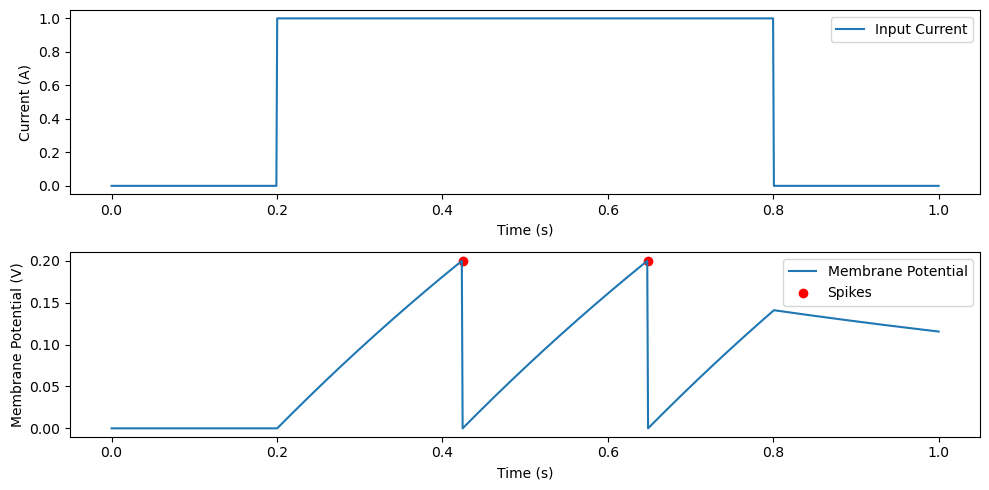

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(simulation_time, dt, input_current, R, C, threshold, reset_voltage):
    # Initialize variables
    num_steps = int(simulation_time / dt)
    time = np.linspace(0, simulation_time, num_steps)
    membrane_potential = np.zeros(num_steps)
    spike_times = []

    # Simulation loop
    for i in range(1, num_steps):
        # Update membrane potential using the leaky integrate-and-fire model equation
        membrane_potential[i] = membrane_potential[i - 1] + (
            (-membrane_potential[i - 1] + input_current[i - 1] * R) / (R * C)
        ) * dt

        # Check for spike condition
        if membrane_potential[i] >= threshold:
            spike_times.append(time[i])
            membrane_potential[i] = reset_voltage

    return time, membrane_potential, spike_times

# Simulation parameters
simulation_time = 1.0  # seconds
dt = 0.001  # seconds (time step)
R = 1.0  # membrane resistance (ohms)
C = 1.0  # membrane capacitance (farads)
threshold = 0.2  # spike threshold voltage (volts)
reset_voltage = 0.0  # reset voltage after spike (volts)

# Generate input current (for example, a step current)
input_current = np.zeros(int(simulation_time / dt))
input_current[int(0.2 / dt):int(0.8 / dt)] = 1.0  # modified input current (0.6 seconds long)

# Run the simulation
time, membrane_potential, spike_times = leaky_integrate_and_fire(
    simulation_time, dt, input_current, R, C, threshold, reset_voltage
)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, input_current, label='Input Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, membrane_potential, label='Membrane Potential')
plt.scatter(spike_times, [threshold] * len(spike_times), color='red', marker='o', label='Spikes')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.legend()

plt.tight_layout()
plt.show()

4. The model above is missing an exponential decay or “shoulder” which represents the refractory period, where in a biological neuron, voltage-gated Na+ channels briefly close immediately following an action potential and a subsequent action potential cannot occur for the refractory period. Instead, there exists a steep linear drop which is not consistent with a neuron. This is because within a neuron, leaky channels allow molecules to flow through, causing a bend/exponential decay.
5. The most challenging part was making the code as accurate as possible. We used ChatGPT to make a baseline code and then edited the parameters from there. We had to change the prompt to receive better results.
6. This homework took us two hours. 